In [1]:
import timeatlas as ta
import pandas as pd
import numpy as np
from timeatlas import plots

## Get the time series ready

In [2]:
s = pd.read_csv("../data/bbdata-weather/4652.csv")
s = pd.DataFrame(data=s["value"].values, index=pd.to_datetime(s["timestamp"]).values)
s.index = s.index.round("S")

In [3]:
ts = ta.TimeSeries(s)

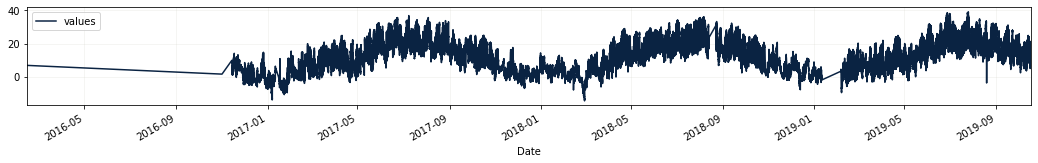

In [4]:
ts.plot()

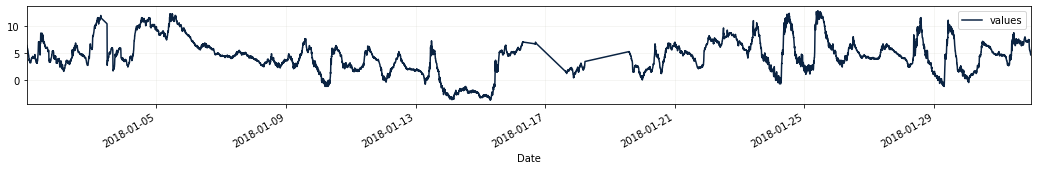

In [5]:
ts = ts["01-2018"]
ts.plot()

### Define a Metadata object

In [6]:
from timeatlas import Metadata, types

# You can use some typed metadata object
my_unit = types.Unit("power", "W", "float")
my_sensor = types.Sensor(2902, "HB/floor2/22-23C/Prises_Power_Tot")

# Or use Python dictionaries
my_location = {
    "building" : "Blue Factory",
    "floor" : "12",
    "room"  : "22C"
}
my_coordinates = {
    "lat" : 46.796611,
    "lon" : 7.147563
}
my_dict = {
    "unit": my_unit,
    "sensor": my_sensor,
    "location": my_location,
    "coordinates": my_coordinates
}

# Create the Metadata object
my_meta = Metadata(my_dict)


In [7]:
ts.metadata = my_meta

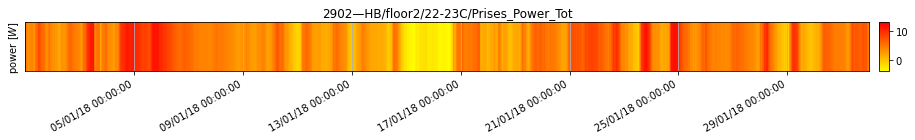

In [8]:
ta.plots.status(ts);

### Train a Facebook Prophet model

In [9]:
m1 = ta.models.Prophet()
m1.fit(ts)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


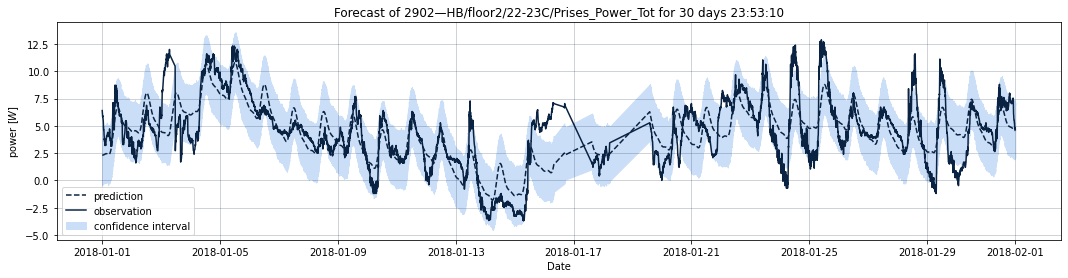

In [10]:
pts1 = m1.predict(ts)
plots.prediction(pts1, ts);

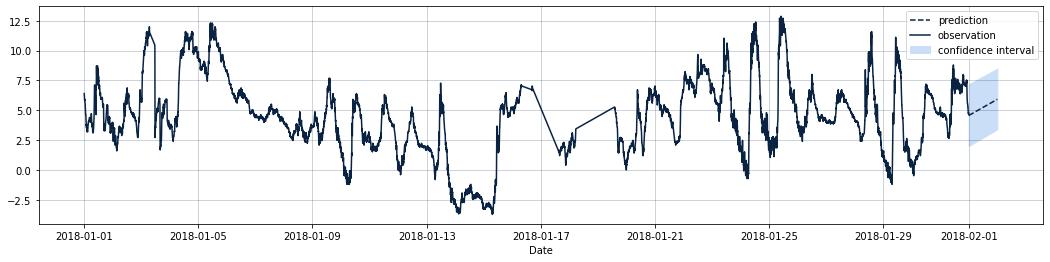

In [11]:
pts2 = m1.predict("24 hours")
plots.prediction(pts2, ts);

## Detect Anomalies

In [12]:
d = ta.detectors.Surprise(m1, ta.metrics.relative_error)

In [24]:
d.alerts("quantile", [0.95])
d.fit(ts)

In [25]:
# Detect anomalies with the fitted detector
a = d.detect(ts)

start


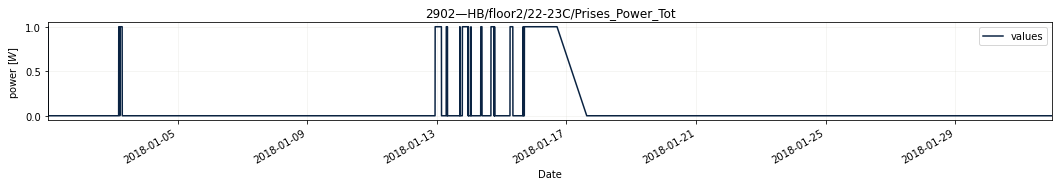

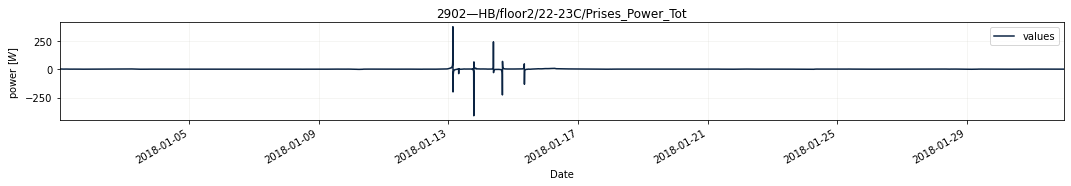

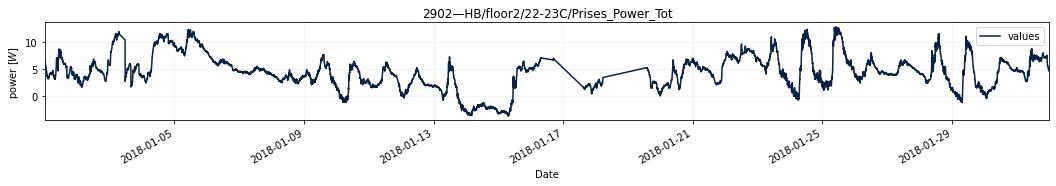

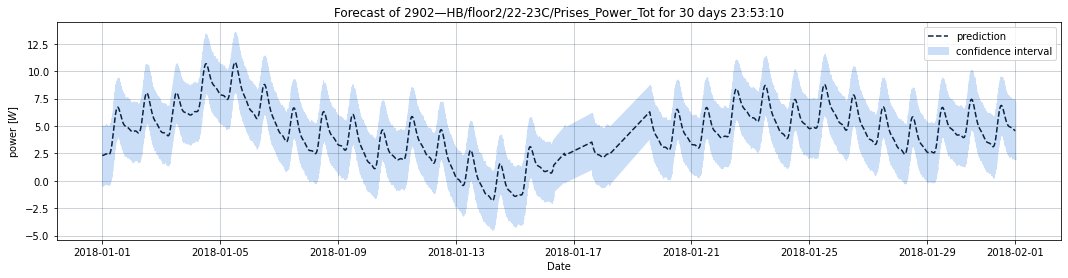

In [26]:
a.plot()
d.surprise.plot()
d.truth.plot()
d.prediction.plot()

